In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
ecom = pd.read_csv("ecommerce.csv")
ecom

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...,...
604,175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
606,177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
607,178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


Identifikasi masalah:

Dataset merupakan record penjualan dari suatu ecommerce, yang keterangannya sebagai berikut:

- terdapat 609 baris dengan 9 kolom data
- category: Kategori lini produk (non numerik)
- product: nama brand beserta spesifikasi jenis produk (non numerik)
- original_price: harga original (numerik)
- price: harga (numerik)
- perc_of_unit_sold: persentasi unit produk tertentu yang terjual (numerik)
- rating: rating produk (numerik)
- shopping: keterangan pengiriman barang (non numerik)
- gender: kategori gender untuk produk (non numerik)

dari kategori yang ada, dapat diambil gambaran komposisi variasi kategori barang yang dijual di ecommerce, kategori barang apa saja yang menghasilkan penjualan yang baik, dan kategori mana yang penjualannya tidak begitu memuaskan (berdasarkan data) -> kolom target: perc_of_unit_sold
Selain itu dapat dilihat juga gambaran pilihan opsi shipping dalam pengiriman barang, dan kecenderungan pembelian kategori terhadap gender.

selain itu, perlu juga diketahui gambaran kepuasan konsumen terhadap produk yang telah dibeli, dari atribut rating

# Tujuan:

1. komposisi variasi kategori produk dalam ecommerce
2. analisa persentase produk terjual terhadap kategorinya
3. rata-rata rating terhadap variasi kategori barang yang dijual di ecommerce
3. analisa pola kecenderungan belanja terhadap variasi gender
4. analisa opsi shipping

In [4]:
## pengecekan data null

ecom.isnull().sum()

Unnamed: 0             0
category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

Kategori data yang memiliki value NaN, bisa diambil 2 pilihan:
- dropna jika data NaN > 50% populasi data keseluruhan
- fillna dengan value tertentu jika data NaN < 50% populasi data keseluruhan

Membandingkan jumlah data NaN pada tiap atribut terhadap keseluruhan populasi baris:

atribut yang paling banyak memiliki value NaN adalah rating dengan jumlah NaN sebanyak 182.
perhitungan:
(182/609) * 100% = 29,89% 

kesimpulan: karena < 50%, maka tidak perlu dilakukan dropna

Karena atribut rating paling banyak memiliki value NaN, maka seluruh atribut data lain yang memiliki nilai NaN juga tidak perlu dilakukan dropna (perbandingan komposisi data NaN terhadap keseluruhan data pasti < 29.89% )

Pilihan yang diambil terhadap missing value adalah fillna dengan value yang diisikan ke dalam kolom = rerata value data tiap atribut (kolom)

## kategori data dengan value NaN dan memiliki tipe data numerik:

- original price
- perc_of_unit_sold
- rating

In [5]:
# mengisi value NaN

ecom['Original_price'].fillna(value=ecom['Original_price'].mean(), inplace= True)
ecom['perc_of_unit_sold'].fillna(value=ecom['perc_of_unit_sold'].mean(), inplace= True)
ecom['rating'].fillna(value=ecom['rating'].mean(), inplace= True)

In [6]:
ecom.isnull().sum()

Unnamed: 0            0
category              0
product               0
Original_price        0
price                 0
perc_of_unit_sold     0
rating                0
shpping_rate         42
gender               28
dtype: int64

# kategori data dengan value NaN dan memiliki tipe data non numerik:

- shipping_rate
- gender

untuk data non numerik, value pengisi nilai NaN: value dengan jumlah paling sedikit di kolom atribut >> hal ini dipilih supaya kemencengan distribusi data tidak terlalu besar

In [7]:
## cari jumlah data yang berbeda dalam kolom shpping_rate:

ecom['shpping_rate'].nunique()

2

In [8]:
## cari data yang berbeda dalam kolom shpping_rate:

ecom['shpping_rate'].unique()

array(['FREE Shipping', 'Eligible for FREE Shipping', nan], dtype=object)

In [9]:
## cari jumlah masing2 data dalam kolom shpping_rate:

ecom['shpping_rate'].value_counts()

FREE Shipping                 356
Eligible for FREE Shipping    211
Name: shpping_rate, dtype: int64

### yang lebih sedikit adalah metode Eligible for Free Shipping >> data NaN dalam atribut shopping_rate akan diisi 'Eligible for FREE Shipping'

In [13]:
## fillna kolom shipping_rate

ecom['shpping_rate'].fillna(value="Eligible for FREE Shipping", inplace=True)

In [14]:
## cek

ecom['shpping_rate'].value_counts()

FREE Shipping                 356
Eligible for FREE Shipping    253
Name: shpping_rate, dtype: int64

In [15]:
## cari jumlah data yang berbeda dalam kolom gender:

ecom['gender'].nunique()

3

In [17]:
## cari jumlah masing2 data dalam kolom gender:

ecom['gender'].value_counts()

men       338
women     155
Unisex     88
Name: gender, dtype: int64

In [18]:
## fillna kolom gender

ecom['gender'].fillna(value="Unisex", inplace=True)

In [19]:
## cek

ecom['gender'].value_counts()

men       338
women     155
Unisex    116
Name: gender, dtype: int64

setelah diisi value data NaN, dilakukan pengecekan highlight dataset

## rata2 perc_of_unit_sold

plt.figure(figsize=(20, 5))
plt.grid(True)
ax = sns.lineplot(x='product', y="perc_of_unit_sold",  data=ecom, ci=None, linewidth=3)
plt.title('persentase unit terjual terhadap produk', fontsize=20)
plt.xticks(rotation=90)
plt.show()

Tidak dibuat plot percentage unit sold karena analisis data percentage per unit bisa ditampilkan dalam tipe pie chart

In [120]:
ecom.drop('Unnamed: 0', axis=1, inplace=True)
ecom

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.000000,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.000000,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,87.807963,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.000000,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,87.807963,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...
604,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.000000,FREE Shipping,men
605,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.000000,FREE Shipping,women
606,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.000000,FREE Shipping,men
607,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.000000,Eligible for FREE Shipping,men


In [ ]:
ecom['product name'] = 

In [123]:
# statistik data

stat = ecom.describe().T
stat

,count,mean,std,min,25%,50%,75%,max
Original_price,609.0,864.498113,1764.385443,42.0,279.00,529.000000,950.00,29970.0
price,609.0,339.434039,285.416406,21.4,140.98,262.490000,444.99,3220.0
perc_of_unit_sold,609.0,57.678161,23.544957,2.0,42.00,57.678161,75.00,99.0
rating,609.0,87.807963,9.561113,20.0,86.00,87.807963,92.00,100.0


setelah diisi value data NaN, dilakukan pengecekan highlight dataset

In [77]:
## distinct value dalam category:

jumlah = ecom['category'].value_counts()
# jumlah
# jumlah['Total Percentage'] = (jumlah['sum']/jumlah['sum'].sum()) * 100
jumlah

Watches                  180
Eyewear                  154
Athletic Shoes            95
Perfumes & Fragrances     63
Casual & Dress Shoes      47
Wallets                   37
Sportswear                33
Name: category, dtype: int64

In [111]:
ecom['category'].nunique()

7

tidak akan dilakukan analisa terhadap tabel distribusi harga karena kategori barang yang dijual berbeda2, mulai dari dompet, jam tangan, perfume, sportswear, dll.
Dengan kategori yang terlalu variatif (atribut non numerik), distribusi harga akan luas sehingga tidak perlu dianalisa.

In [103]:
jumlah1 = ecom.groupby('category').count()
# jumlah1['product']
# jumlah1.info()

# jumlah1.drop('gender', axis = 1, inplace=True)
# jumlah1.drop('shpping_rate', axis = 1, inplace=True)
# jumlah1.drop('rating', axis = 1, inplace=True)
# jumlah1.drop('perc_of_unit_sold', axis = 1, inplace=True)

,Unnamed: 0,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
category,,,,,,,,
Athletic Shoes,95,95,95,95,95,95,95,95
Casual & Dress Shoes,47,47,47,47,47,47,47,47
Eyewear,154,154,154,154,154,154,154,154
Perfumes & Fragrances,63,63,63,63,63,63,63,63
Sportswear,33,33,33,33,33,33,33,33
Wallets,37,37,37,37,37,37,37,37
Watches,180,180,180,180,180,180,180,180


C:\Users\Andita\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


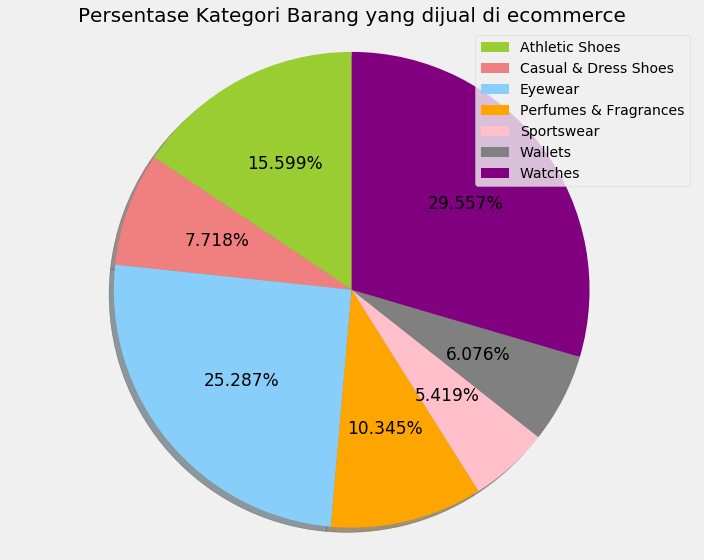

In [116]:
jumlah1['Percentage'] = (jumlah1['product']/jumlah1['product'].sum()) * 100
colors = ['yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'grey', 'purple']

plt.figure(figsize=(10, 8))
patches = plt.pie(
    jumlah1['Percentage'], 
    colors=colors,
    startangle=90, 
    shadow=True, 
    textprops={
    'size': 17,
    'color': 'black'
    },
    autopct='%.3f%%', 
#     explode=(0.1, 0.1, 0.1)
)
plt.legend(patches, labels=jumlah1.index, loc='upper right')
plt.axis('equal')
plt.title('Persentase Kategori Barang yang dijual di ecommerce', fontsize=20)
plt.tight_layout()
plt.savefig('kategori_piechart.png')
plt.show()


dari pie chart di atas, terlihat bahwa komposisi kategori barang dengan variasi terbanyak adalah kategori watches, diikuti oleh eyewear.

C:\Users\Andita\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


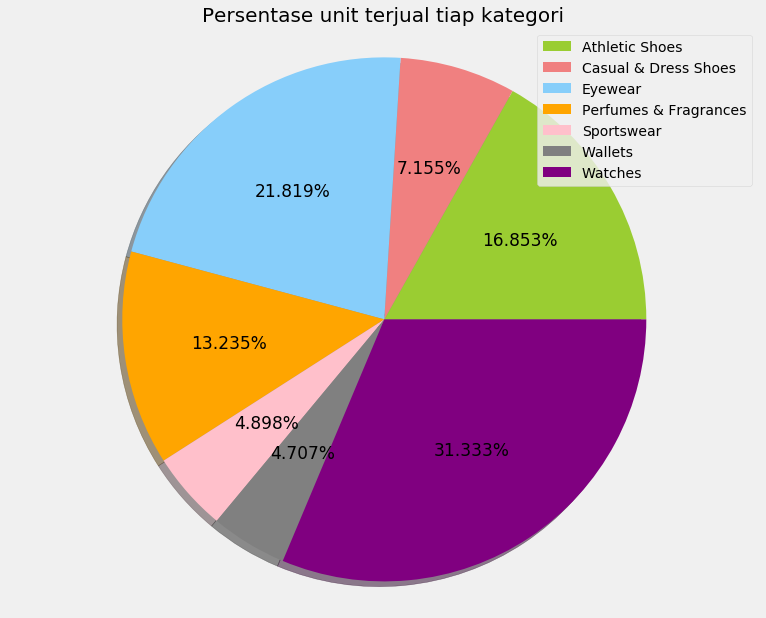

In [117]:
## pie chart variasi product line dalam ecommerce
colors = ['yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'grey', 'purple']
total = ecom.pivot_table(index=['category'], values="perc_of_unit_sold", aggfunc=['sum'])
total['Total Percentage'] = (total['sum']/total['sum'].sum()) * 100
# colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(12, 10))
patches = plt.pie(
    total['Total Percentage'], 
    colors=colors,
    shadow=True, 
    textprops={
    'size': 17,
    'color': 'black'
    },
    autopct='%.3f%%', 
    
)
plt.legend(patches, labels=total.index, loc='upper right')
plt.axis('equal')
plt.title('Persentase unit terjual tiap kategori', fontsize=20)
plt.savefig('persentase_terjual.png')
plt.show()

sementara persentase unit terjual tiap kategori, paling tinggi adalah kategori watches, diikuti oleh produk atletic shoes

dari pie chart sebelumnya dapat dilihat bahwa kategori watches merupakan kategori dengan variasi produk paling banyak diantara 6 kategori produk lain yang dijual di ecommerce. Hal ini sejalan dengan persentase unit terjual, dimana unit dengan persentasi penjualan tertinggi juga merupakan kategori watches.

demikian juga dengan kategori barang yang lain, urutan variasi dari terbanyak sampai paling sedikit, sejalan dengan unit terjual tiap kategori, dari jumlah terbanyak sampai paling sedikit.

Dapat diambil kesimpulan sementara bahwa jika ingin meningkatkan persentase unit terjual tiap kategori produk, harus diperbanyak variasi produk dalam kategori tersebut.

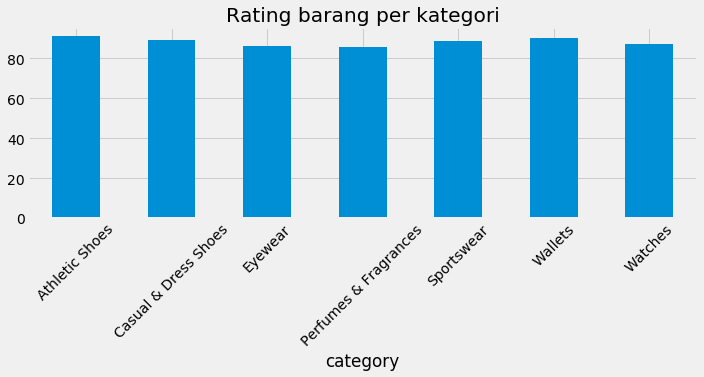

In [140]:
## rating rata-rata tiap kategori produk

plt.figure(figsize=(10, 6))
ecom.groupby('category')['rating'].mean().plot(kind='bar')
plt.title('Rating barang per kategori')
plt.tight_layout()
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig('rating.png')
plt.show()

Dari figure rating barang per kategori, terlihat bahwa seluruh kategori memiliki rata-rata rating di atas 80, sehingga dapat disimpulkan bahwa konsumen puas dengan kondisi barang yang dibeli, metode shipping yang ditawarkan, maupun harga barang.

In [33]:
ecom.pivot_table(index=['category', 'product'], values="perc_of_unit_sold")

perc_of_unit_sold
category       product                                                              
Athletic Shoes Adidas Asweerun Running Shoes For Men - Core Black               91.0
               Adidas Courtsmash Perforated Genuine Leather Me...               78.0
               Adidas Duramo 9 Nylon Mesh Rubber-Accent Side-S...               75.0
               Adidas Duramo 9 Running Shoes For Men - Core Black               68.0
               Adidas Grand Court Base Faux Leather Contrast S...               75.0
...                                                                              ...
Watches        Tissot Womens Round Black Dial Silicone Bracele...               14.0
               Watch for Men by Casio , Analog , Chronograph ,...               80.0
               Watch for Women by Tory Burch, Buddy Signature,...               30.0
               hugo boss Governor Men's Black Dial Stainless S...               55.0
               hugo boss Jet Men's White Dial Leather Band Wat...               80.0

[602 rows x 1 columns]

In [124]:
## analisa terhadap gender

ecom['gender'].unique()

array(['men', 'women', 'Unisex'], dtype=object)

terdapat 3 kategori gender dalam dataset ini, yaitu men, women, dan unisex

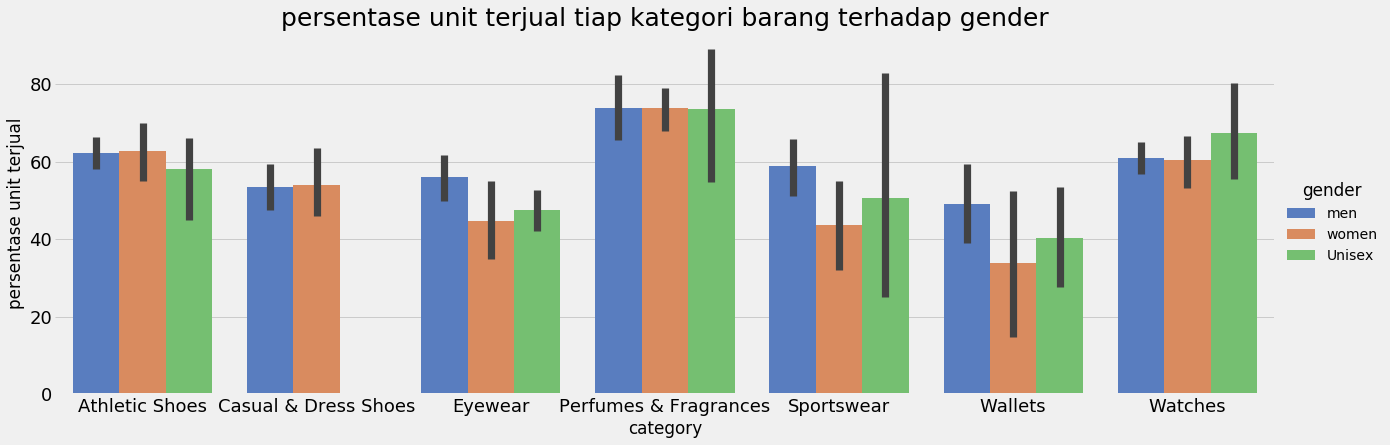

In [133]:
## analisa kategori barang terhadap konsumen berdasarkan gender:

g = sns.catplot(x="category", y="perc_of_unit_sold", hue="gender", data=ecom,
                height=6, kind="bar", palette="muted", aspect=24/8)
g.despine(left=True)
g.set_ylabels("persentase unit terjual")
plt.title('persentase unit terjual tiap kategori barang terhadap gender', fontsize=25)
plt.tick_params(labelsize=18)
plt.savefig('kat_gender.png')
plt.show()

grafik di atas menunjukkan persentase unit terjual tiap kategori yang ditawarkan ecommerce, terhadap gender konsumen.
ada 3 kategori gender konsumen dalam dataset, yaitu men, women, dan unisex.

dari grafik terlihat bahwa untuk barang dengan kategori perfumes & fragrances, persentase unit terjualnya paling tinggi diantara kategori lain (dalam grafik ini), dengan konsumen yang membeli produk terdistribusi hampir merata antara gender pria, wanita, maupun unisex.

Data paling rendah terlihat dari barang dengan kategori wallets, dimana konsumen gender perempuan paling sedikit melakukan transaksi pembelian dompet di ecommerce.
Hal ini bisa saja terjadi karena variasi barang kategori dompet untuk wanita kurang bervariasi, sehingga persentase unit terjualnya paling rendah di antara yang lain.

C:\Users\Andita\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


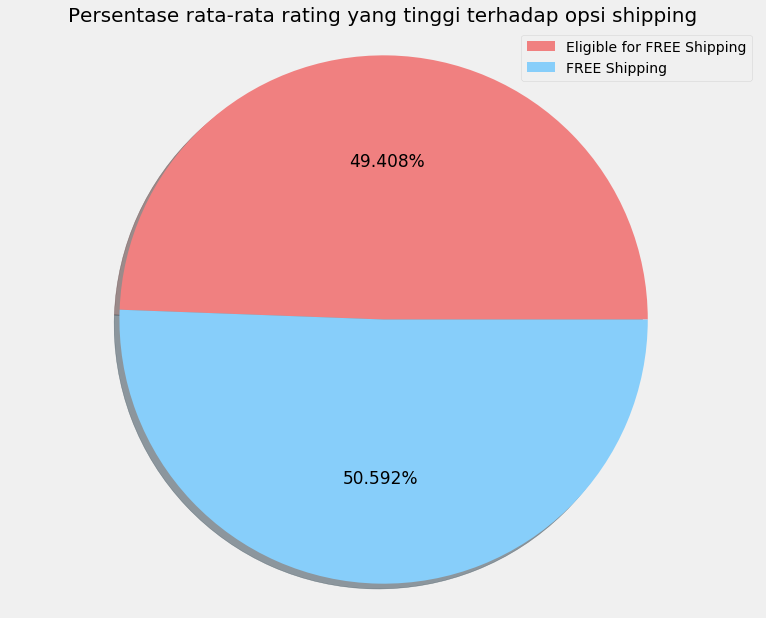

In [147]:
colors = ['lightcoral', 'lightskyblue']
ship_rate = df.pivot_table(index=['shpping_rate'], values='rating', aggfunc=['mean'])
ship_rate['Total'] = (ship_rate['mean']/ship_rate['mean'].sum()) * 100
# colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(12, 10))
patches = plt.pie(
    ship_rate['Total'], 
    colors=colors,
    shadow=True, 
    textprops={
    'size': 17,
    'color': 'black'
    },
    autopct='%.3f%%', 
    
)
plt.legend(patches, labels=ship_rate.index, loc='upper right')
plt.axis('equal')
plt.title('Persentase rata-rata rating yang tinggi terhadap opsi shipping', fontsize=20)
# plt.savefig('rating_shipp.png')
plt.show()

dari pie chart di atas terlihat bahwa konsumen memberikan rating rata-rata lebih tinggi kepada pembelian menggunakan opsi yang menawarkan free shipping, dengan komposisi rating rata-rata tinggi sebanyak 50.59%.

In [21]:
ecom.head()

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.000000,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.000000,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,87.807963,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.000000,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,87.807963,Eligible for FREE Shipping,men


# Kesimpulan

1. komposisi variasi kategori produk dan analisa persentase produk terjual terhadap kategori memiliki relasi yang berkesesuaian, dimana makin banyak variasi kategori produk yang ditawarkan, maka persentasi produk terjual di kategori tersebut makin tinggi.
2. Rating rata-rata penjualan produk di ecommerce cukup memuaskan, dengan masing-masing kategori memiliki rating di atas 80 (dari 100), sehingga dapat disimpulkan bahwa konsumen cukup puas dengan kondisi barang yang dibeli, harga barang, dan opsi pengiriman dari ecommerce.
3. analisis pola kecenderungan belanja terhadap variasi gender menunjukkan bahwa untuk barang dengan kategori perfumes & fragrances, persentase unit terjualnya paling tinggi diantara kategori lain (dalam grafik ini), dengan konsumen yang membeli produk terdistribusi hampir merata antara gender pria, wanita, maupun unisex. Sementara data paling rendah terlihat dari barang dengan kategori wallets, dimana konsumen gender perempuan paling sedikit melakukan transaksi pembelian dompet di ecommerce.
Hal ini bisa saja terjadi karena variasi barang kategori dompet untuk wanita kurang bervariasi, sehingga persentase unit terjualnya paling rendah di antara yang lain.

4. dilihat dari rata-rata rating terhadap opsi shipping yang ditawarkan, konsumen sedikit lebih memberikan rating lebih tinggi terhadap pengiriman dengan opsi Free shipping

# Saran

1. Jika ingin meningkatkan persentase unit terjual tiap kategori, ecommerce perlu menambah variasi produk dalam tiap kategori
2. Menambah variasi kategori produk wallets untuk konsumen wanita
3. Tawarkan lebih banyak produk dengan opsi Free Shipping